In [46]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
missing_data=train.isnull().sum()
missing_data=missing_data.sort_values(ascending=False)
missing_data

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [7]:
train[train['Age']==30][train['Survived']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.0000,NaN,S
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,NaN,C
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.0,0,0,C 7076,7.2500,NaN,S
418,419,0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,NaN,S
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C


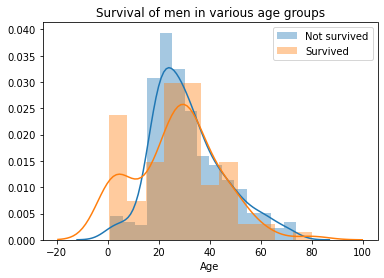

In [8]:
male=train[train['Sex']=='male']
men=sns.distplot(male['Age'].dropna()[male['Survived']==0],label='Not survived')
men=sns.distplot(male['Age'].dropna()[male['Survived']==1],label='Survived')
men.set_title('Survival of men in various age groups')
men.legend()

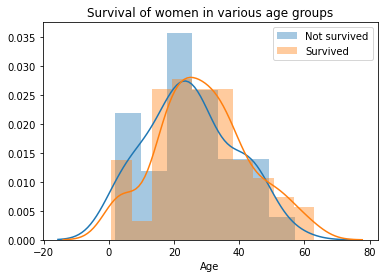

In [9]:
female=train[train['Sex']=='female']
wamen=sns.distplot(female['Age'].dropna()[female['Survived']==0],label='Not survived')
wamen=sns.distplot(female['Age'].dropna()[female['Survived']==1],label='Survived')
wamen.set_title('Survival of women in various age groups')
wamen.legend()

Text(0.5, 1.0, 'Survival of people boarded at different ports')

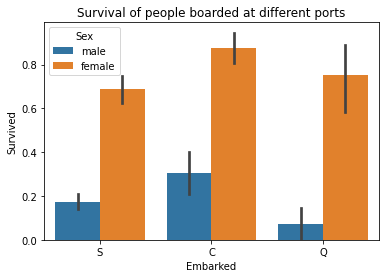

In [10]:
emb=sns.barplot(x=train['Embarked'].dropna(),y=train['Survived'],hue=train['Sex'])
emb.set_title("Survival of people boarded at different ports")

Text(0.5, 1.0, 'Chances of survival in different classes')

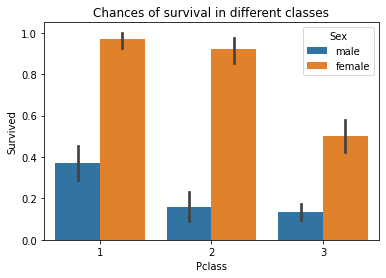

In [11]:
sns.barplot(x='Pclass', y='Survived',hue='Sex', data=train).set_title("Chances of survival in different classes")

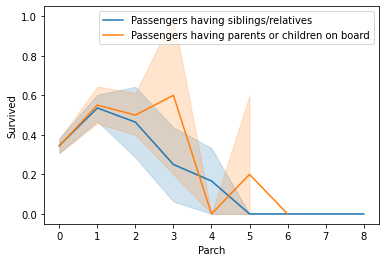

In [12]:
sns.lineplot(x=train['SibSp'],y=train['Survived'],label='Passengers having siblings/relatives')
sns.lineplot(x=train['Parch'],y=train['Survived'],label='Passengers having parents or children on board')

In [13]:
age_mean=train['Age'].mean()
age_std=train['Age'].std()
no_of_mv=train['Age'][train['Age'].isnull()==True].size
fill_age=np.random.randint(age_mean-age_std,age_mean+age_std,size=no_of_mv)
train['Age'][train['Age'].isnull()==True]=fill_age
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    33.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [15]:
train['Embarked'][train['Embarked'].isnull()==True]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [16]:
train['Embarked'].loc[61]='S'
train['Embarked'].loc[829]='S'
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
sex_map={"male":1,"female":0}
train=train.replace({'male':1,'female':0})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [18]:
port_map={'S':1,'C':2,'Q':3}
train=train.replace(port_map)
train['Embarked']=train['Embarked'].astype(int)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,33.0,1,2,W./C. 6607,23.4500,NaN,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,2


In [19]:
train=train.drop(['PassengerId'],axis=1)

In [20]:
train=train.drop(['Name'],axis=1)
train=train.drop(['Ticket'],axis=1)
train=train.drop(['Cabin'],axis=1)

In [21]:
train['Age']=train['Age'].astype(int)
train['Age'].describe()

count    891.000000
mean      29.450056
std       13.493924
min        0.000000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
train['Age'][train['Age']<=10]=0
train['Age'][(train['Age']>10)&(train['Age']<=17)]=1
train['Age'][(train['Age']>17)&(train['Age']<=25)]=2
train['Age'][(train['Age']>25)&(train['Age']<=30)]=3
train['Age'][(train['Age']>30)&(train['Age']<=35)]=4
train['Age'][(train['Age']>35)&(train['Age']<=40)]=5
train['Age'][(train['Age']>40)&(train['Age']<=50)]=6
train['Age'][(train['Age']>50)&(train['Age']<=65)]=7
train['Age'][(train['Age']>65)&(train['Age']<=80)]=8

In [23]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2,1,0,7.2500,1
1,1,1,0,5,1,0,71.2833,2
2,1,3,0,3,0,0,7.9250,1
3,1,1,0,4,1,0,53.1000,1
4,0,3,1,4,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,1,3,0,0,13.0000,1
887,1,1,0,2,0,0,30.0000,1
888,0,3,0,4,1,2,23.4500,1
889,1,1,1,3,0,0,30.0000,2


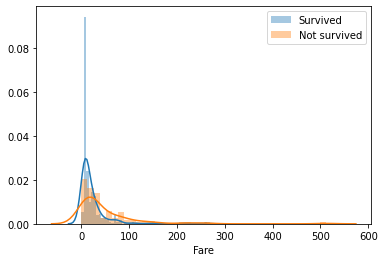

In [24]:
train['Fare']=train['Fare'].astype(int)
fare_fig=sns.distplot(train['Fare'][train['Survived']==0],label='Survived')
fare_fig=sns.distplot(train['Fare'][train['Survived']==1],label='Not survived')
fare_fig.legend()

In [25]:
train['Fare'].describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [26]:
train['Fare'][train['Fare']<=7]=0
train['Fare'][(train['Fare']>7)&(train['Fare']<=14)]=1
train['Fare'][(train['Fare']>14)&(train['Fare']<=31)]=2
train['Fare'][(train['Fare']>31)&(train['Fare']<=50)]=3
train['Fare'][(train['Fare']>50)&(train['Fare']<=100)]=4
train['Fare'][(train['Fare']>100)&(train['Fare']<=250)]=5
train['Fare'][(train['Fare']>250)&(train['Fare']<=512)]=6

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [28]:
sex_map={"male":1,"female":0}
test=test.replace({'male':1,'female':0})
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [29]:
ag_mean=test['Age'].mean()
ag_std=test['Age'].std()
no_mv=test['Age'][test['Age'].isnull()==True].size
fill_age=np.random.randint(ag_mean-ag_std,ag_mean+ag_std,size=no_mv)
test['Age'][test['Age'].isnull()==True]=fill_age
test['Age']=test['Age'].astype(int)
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [30]:
test['Fare'].loc[152]=3

In [31]:
test['Fare']=test['Fare'].astype(int)
test['Fare'][test['Fare']<=7]=0
test['Fare'][(test['Fare']>7)&(test['Fare']<=14)]=1
test['Fare'][(test['Fare']>14)&(test['Fare']<=31)]=2
test['Fare'][(test['Fare']>31)&(test['Fare']<=50)]=3
test['Fare'][(test['Fare']>50)&(test['Fare']<=100)]=4
test['Fare'][(test['Fare']>100)&(test['Fare']<=250)]=5
test['Fare'][(test['Fare']>250)&(test['Fare']<=512)]=6

In [32]:
test=test.drop(['Name'],axis=1)

In [33]:
test=test.drop(['Ticket'],axis=1)

In [34]:
test=test.drop(['Cabin'],axis=1)

In [35]:
test=test.drop(['PassengerId'],axis=1)

In [36]:
port_map={'S':1,'C':2,'Q':3}
test=test.replace(port_map)
test['Embarked']=test['Embarked'].astype(int)

In [37]:
test['Age'][test['Age']<=10]=0
test['Age'][(test['Age']>10)&(test['Age']<=17)]=1
test['Age'][(test['Age']>17)&(test['Age']<=25)]=2
test['Age'][(test['Age']>25)&(test['Age']<=30)]=3
test['Age'][(test['Age']>30)&(test['Age']<=35)]=4
test['Age'][(test['Age']>35)&(test['Age']<=40)]=5
test['Age'][(test['Age']>40)&(test['Age']<=50)]=6
test['Age'][(test['Age']>50)&(test['Age']<=65)]=7
test['Age'][(test['Age']>65)&(test['Age']<=80)]=8

In [38]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,4,0,0,0,3
1,3,0,6,1,0,0,1
2,2,1,7,0,0,1,3
3,3,1,3,0,0,1,1
4,3,0,2,1,1,1,1
...,...,...,...,...,...,...,...
413,3,1,5,0,0,1,1
414,1,0,5,0,0,5,2
415,3,1,5,0,0,0,1
416,3,1,5,0,0,1,1


In [39]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2,1,0,0,1
1,1,1,0,5,1,0,4,2
2,1,3,0,3,0,0,0,1
3,1,1,0,4,1,0,4,1
4,0,3,1,4,0,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,1,3,0,0,1,1
887,1,1,0,2,0,0,2,1
888,0,3,0,4,1,2,2,1
889,1,1,1,3,0,0,2,2


In [40]:
x_train=train.drop(['Survived'],axis=1)
x_test=test
y_train=train['Survived']


In [82]:
rf=RandomForestClassifier(n_estimators=40)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
round(rf.score(x_train,y_train)*100,2)

90.8

In [88]:
acc=round(rf.score(x_train,y_train) * 100, 2)
acc

90.8

In [98]:
log_reg=LogisticRegression(fit_intercept=True,solver='liblinear')
log_reg.fit(x_train,y_train)
lgrg_pred=log_reg.predict(x_test)
acc_lgrg=round(log_reg.score(x_train,y_train)*100,2)
acc_lgrg

80.02

In [87]:
knn=KNeighborsClassifier(weights='distance')
knn.fit(x_train,y_train)
acc_knn=round(knn.score(x_train,y_train)*100,2)
acc_knn

90.68

Feature importance - random forest

In [109]:
feature_imp=pd.DataFrame(rf.feature_importances_,[x_train.columns])
feature_imp['imp']=feature_imp[0]*100
feature_imp=feature_imp.drop([0],axis=1)
feature_imp['imp']

Pclass      13.015807
Sex         33.530345
Age         19.566218
SibSp        8.258450
Parch        5.932537
Fare        14.141503
Embarked     5.555139
Name: imp, dtype: float64